<a href="https://colab.research.google.com/github/audreymoreira/case_ENEM_2017/blob/main/Vistas_do_ENEM_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENEM 2017 - ANÁLISE DOS MICRODADOS E ALGUMAS RELAÇÕES INTERESSANTES
## TRABALHO EM ANDAMENTO
### Audrey Moreira

Imports

In [1]:
import dask
import dask.dataframe as dd
import zipfile
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Começo do tratamento: A aquisição do arquivo de dados no processo que nos permite analisar seu conteúdo. O arquivo tem um pouco mais de 3GB.
### Fiz upload do arquivo .zip, escolhi as colunas que permitem uma análise inicial para reduzir a carga na memória.  

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    print(*z.namelist(),sep="\n")

MICRODADOS_ENEM_2017.csv


In [3]:
colunas =['TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
          'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
          'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
          'Q001', 'Q002', 'Q006', 'Q025']

dtype={'TP_ESCOLA': 'category',
       'NO_MUNICIPIO_PROVA': 'category',
       'SG_UF_PROVA': 'category',
       'TP_PRESENCA_CH': 'category',
       'TP_PRESENCA_CN': 'category',
       'TP_PRESENCA_LC': 'category',
       'TP_PRESENCA_MT': 'category',
       'NU_NOTA_CH': 'float16',
       'NU_NOTA_CN': 'float16',
       'NU_NOTA_LC': 'float16',
       'NU_NOTA_MT': 'float16',
       'NU_NOTA_REDACAO': 'float16',
       'Q001': 'category',
       'Q002': 'category',
       'Q006': 'category',
       'Q025': 'category'}

In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    with z.open('MICRODADOS_ENEM_2017.csv') as f:
        enem_2017 = pd.read_csv(f,sep=';',encoding='ISO-8859-1',usecols=colunas,dtype=dtype)


### Este é o principal dataset: Este dataframe tem esta dimensão:

In [5]:
enem_2017.shape

(6731278, 16)

### Escolhi 4 questões do Questionário Sócio-Econômico: duas sobre a educação/formação dos pais, a renda mensal da família e ter internet em casa. 
### Calculando a porcentagem de estudantes que respondeu as questões escolhidas do Questionário Sócio-Econômico:

In [6]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
dtype: int64

### As quatro questões escolhidas Q001, Q002, Q006 e Q25 foram respondidas por quase todos os estudantes, exceto 1. Portanto as respostas, se honestas, serão significativas.

# Cálculo da NOTA FINAL: é a média aritmética das notas em Ciências Naturais, Ciências Humanas, Linguagem e Códigos, Matemática e Redação.

In [7]:
enem_2017['NOTA_FINAL'] = (enem_2017['NU_NOTA_CN'] + enem_2017['NU_NOTA_CH'] + enem_2017['NU_NOTA_LC'] + enem_2017['NU_NOTA_MT'] + enem_2017['NU_NOTA_REDACAO']) / 5

In [8]:
enem_2017

,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,1,Araraquara,SP,1,1,1,1,445.50,589.00,621.5,465.50,560.0,E,D,D,B,536.50
1,1,Cassilândia,MS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,C,A,NaN
2,1,São Paulo,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,G,B,NaN
3,1,Lages,SC,1,1,1,1,604.00,610.50,564.0,591.00,580.0,E,D,D,B,589.50
4,1,Maceió,AL,1,1,1,1,482.00,569.00,571.0,584.50,580.0,A,B,C,B,557.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,3,São Paulo,SP,1,1,1,1,520.00,571.00,558.5,578.00,680.0,G,E,O,B,581.50
6731274,1,Jaraguá,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,B,A,NaN
6731275,2,Rio de Janeiro,RJ,1,1,1,1,461.25,424.25,431.5,407.50,540.0,A,A,B,B,452.75
6731276,1,Contagem,MG,1,1,1,1,541.00,587.00,528.5,479.25,0.0,B,B,D,A,427.25


# A distribuição de NOTAS FINAIS com todos os dados:

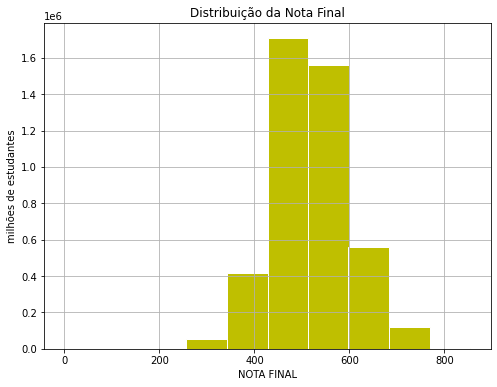

In [9]:
plt.figure(figsize = (8, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('milhões de estudantes')
plt.title('Distribuição da Nota Final')
enem_2017['NOTA_FINAL'].hist(color='y', edgecolor="white", bins=10)

# A mediana de NOTA FINAL é:

In [10]:
enem_2017['NOTA_FINAL'].median()


514.0

# A ausência dos alunos é significativa: mais de dois milhões de alunos não fizeram as provas em 2017.

In [11]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
NOTA_FINAL            2304586
dtype: int64

# A maior NOTA FINAL no ENEM 2017 foi:

In [12]:
nota_maxima = enem_2017['NOTA_FINAL'].max()
nota_maxima

855.0

# E foi obtida por um estudante com estes dados:

In [13]:
enem_2017.loc[enem_2017['NOTA_FINAL'] == nota_maxima]

,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
668502,3,São José dos Pinhais,PR,1,1,1,1,853.0,831.5,724.0,927.5,940.0,G,G,Q,B,855.0


# Resultado por Tipo de Escola - Questionário Sócio-Econômico.
## Tipo de escola:
### Não respondeu 1
### Pública       2
### Privada       3
### Exterior      4

#### Evidencia a melhor performance do Exterior e das Escolas Privadas, tanto na Nota Final quanto na Redação.

In [14]:
tipo_escola = enem_2017.groupby('TP_ESCOLA').mean()
tipo_escola = tipo_escola.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
tipo_escola = tipo_escola.sort_values(by='NOTA_FINAL', ascending=False).reset_index()
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map({
    '1':'Não respondeu',
    '2':'Pública',
    '3':'Privada',
    '4':'Exterior'},)
tipo_escola

,TP_ESCOLA,NU_NOTA_REDACAO,NOTA_FINAL
0,Exterior,697.00,626.0
1,Privada,647.50,589.5
2,Não respondeu,521.00,519.5
3,Pública,496.75,497.5


<BarContainer object of 4 artists>

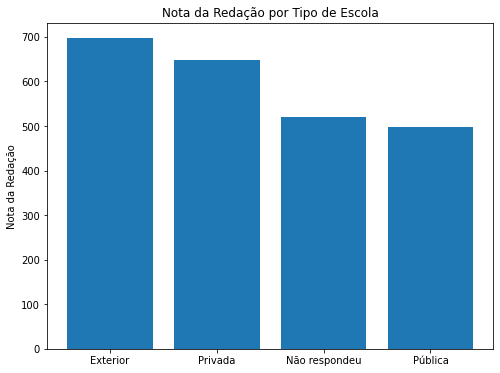

In [15]:
plt.figure(figsize = (8, 6))
plt.ylabel('Nota da Redação')
plt.title('Nota da Redação por Tipo de Escola')
plt.bar('TP_ESCOLA', 'NU_NOTA_REDACAO', data=tipo_escola)

<function matplotlib.pyplot.show(*args, **kw)>

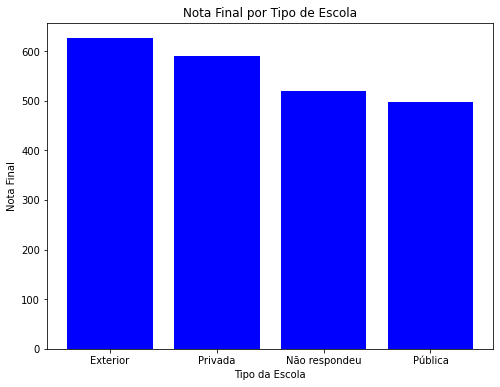

In [16]:
var_x = tipo_escola['TP_ESCOLA']
var_y = tipo_escola['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Tipo da Escola')
plt.ylabel('Nota Final')
plt.title('Nota Final por Tipo de Escola')
plt.show

In [17]:
faixa_de_renda = pd.value_counts(enem_2017['Q006'])
faixa_de_renda = faixa_de_renda.to_frame()
faixa_de_renda=faixa_de_renda.sort_index()
faixa_de_renda.reset_index(drop=False)
faixa_de_renda.rename(columns = {'Q006':'Contagem_por_Faixa'}, inplace = True)
faixa_de_renda

,Contagem_por_Faixa
A,289513
B,1910020
C,1652208
D,752470
E,540613
F,335386
G,365714
H,243205
I,170866
J,104097


# Distribuição de estudantes por faixa de renda na prova.

<function matplotlib.pyplot.show(*args, **kw)>

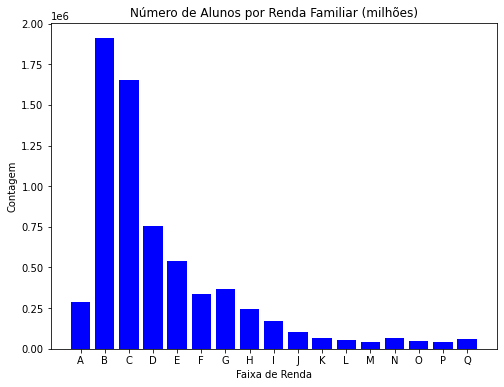

In [18]:
var_x = faixa_de_renda.index
var_y = faixa_de_renda['Contagem_por_Faixa']
plt.figure(figsize = (8, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.title('Número de Alunos por Renda Familiar (milhões)')
plt.show

In [19]:
renda_e_nota_final = enem_2017[['Q006', 'NOTA_FINAL']]
renda_e_nota_final = renda_e_nota_final.groupby('Q006').mean().reset_index()
renda_e_nota_final

,Q006,NOTA_FINAL
0,A,474.75
1,B,482.75
2,C,503.25
3,D,516.50
4,E,527.50
5,F,539.00
6,G,549.50
7,H,562.00
8,I,575.50
9,J,585.50


# Relação entre RENDA FAMILIAR e média da NOTA FINAL


<function matplotlib.pyplot.show(*args, **kw)>

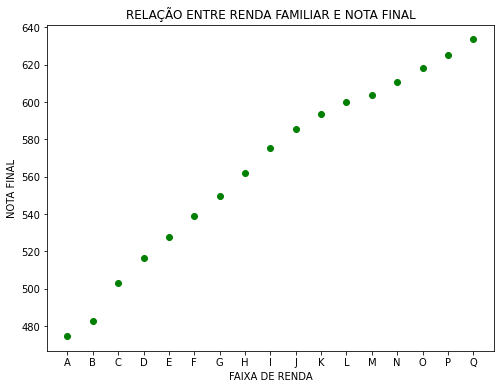

In [20]:
var_x = renda_e_nota_final['Q006']
var_y = renda_e_nota_final['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.scatter(var_x,var_y, color='green')
plt.xlabel('FAIXA DE RENDA')
plt.ylabel('NOTA FINAL')
plt.title('RELAÇÃO ENTRE RENDA FAMILIAR E NOTA FINAL')
plt.show

# Observando o comportamento da NOTA FINAL por ESTADOS

In [21]:
media_por_estado = enem_2017.groupby('SG_UF_PROVA').mean()
media_por_estado = media_por_estado.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
media_por_estado = media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()
media_por_estado

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,537.00,537.50
1,RJ,548.50,536.50
2,MG,545.50,535.50
3,SP,534.00,534.50
4,RS,536.50,533.00
5,DF,541.50,532.50
6,PR,526.00,531.00
7,ES,534.00,529.50
8,GO,531.00,521.00
9,MS,508.25,513.50


<function matplotlib.pyplot.show(*args, **kw)>

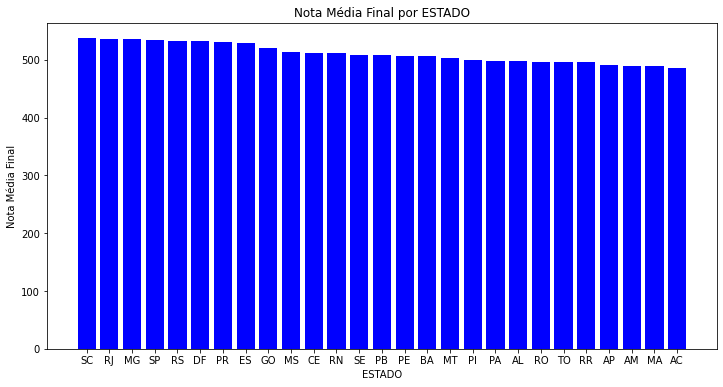

In [22]:
var_x = media_por_estado['SG_UF_PROVA']
var_y = media_por_estado['NOTA_FINAL']
plt.figure(figsize = (12, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('ESTADO')
plt.ylabel('Nota Média Final')
plt.title('Nota Média Final por ESTADO')
plt.show

### Neste gráfico vemos que os cinco primeiros Estados são das regiões Sul e Sudeste.

# O estado brasileiro com a maior média no ENEM 2017 foi:

In [23]:
melhor_media_estado = media_por_estado['NOTA_FINAL'].max()
media_por_estado.loc[media_por_estado['NOTA_FINAL'] == melhor_media_estado]

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,537.0,537.5


# Fonte externa: Este arquivo contem dados sobre o IDHM e IDHM(Renda), ambos para 2017, por Estado e Região Geográfica.

In [24]:
idh_estados = pd.read_excel('/content/drive/MyDrive/COLAB_DADOS/IDH_ESTADOS.xlsx')
idh_estados

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,DF,CENTRO-OESTE,0.850,0.890
1,SP,SUDESTE,0.826,0.854
2,SC,SUL,0.808,0.866
3,RJ,SUDESTE,0.796,0.858
4,PR,SUL,0.792,0.843
5,MG,SUDESTE,0.787,0.875
6,RS,SUL,0.787,0.849
7,MT,CENTRO-OESTE,0.774,0.825
8,ES,SUDESTE,0.772,0.850
9,GO,CENTRO-OESTE,0.769,0.822


In [25]:
idh_por_regiao_e_nota = pd.merge(idh_estados,media_por_estado, on='SG_UF_PROVA', how = 'outer') 
idh_por_regiao_e_nota

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,DF,CENTRO-OESTE,0.850,0.890,541.50,532.50
1,SP,SUDESTE,0.826,0.854,534.00,534.50
2,SC,SUL,0.808,0.866,537.00,537.50
3,RJ,SUDESTE,0.796,0.858,548.50,536.50
4,PR,SUL,0.792,0.843,526.00,531.00
5,MG,SUDESTE,0.787,0.875,545.50,535.50
6,RS,SUL,0.787,0.849,536.50,533.00
7,MT,CENTRO-OESTE,0.774,0.825,488.25,502.75
8,ES,SUDESTE,0.772,0.850,534.00,529.50
9,GO,CENTRO-OESTE,0.769,0.822,531.00,521.00


In [26]:
enem_2017 = pd.merge(idh_estados, enem_2017, on='SG_UF_PROVA', how = 'outer')
enem_2017

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),TP_ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,462.5,535.0,562.0,415.50,740.0,B,B,D,B,543.0
1,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,C,A,NaN
2,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,515.5,516.5,466.0,509.25,680.0,B,B,C,B,537.5
3,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,618.5,662.5,637.5,613.00,560.0,C,C,L,B,618.5
4,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,D,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,AL,NORDESTE,0.683,0.783,1,Maceió,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,A,B,A,NaN
6731274,AL,NORDESTE,0.683,0.783,1,Penedo,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,E,D,B,NaN
6731275,AL,NORDESTE,0.683,0.783,1,Maceió,1,1,1,1,579.0,602.5,570.5,539.50,760.0,E,E,F,A,610.5
6731276,AL,NORDESTE,0.683,0.783,2,Santana do Ipanema,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,B,A,A,NaN


# Estas informações são então combinadas com os dados do ENEM:

In [27]:
estados_e_regioes = pd.merge(media_por_estado, idh_estados, on='SG_UF_PROVA', how = 'outer')
estados_e_regioes

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,537.00,537.50,SUL,0.808,0.866
1,RJ,548.50,536.50,SUDESTE,0.796,0.858
2,MG,545.50,535.50,SUDESTE,0.787,0.875
3,SP,534.00,534.50,SUDESTE,0.826,0.854
4,RS,536.50,533.00,SUL,0.787,0.849
5,DF,541.50,532.50,CENTRO-OESTE,0.850,0.890
6,PR,526.00,531.00,SUL,0.792,0.843
7,ES,534.00,529.50,SUDESTE,0.772,0.850
8,GO,531.00,521.00,CENTRO-OESTE,0.769,0.822
9,MS,508.25,513.50,CENTRO-OESTE,0.766,0.847


# O estado com a melhor média de notas, nesta edição do ENEM:

In [28]:
melhor_estado = estados_e_regioes['NOTA_FINAL'].max()
estados_e_regioes.loc[estados_e_regioes['NOTA_FINAL'] == melhor_estado]

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,537.0,537.5,SUL,0.808,0.866


# Analisando o desempenho por REGIÃO GEOGRÁFICA e índices de desenvolvimento e renda.

In [29]:
estados_e_regioes = estados_e_regioes.sort_values(by='NOTA_FINAL', ascending=False)
media_por_regiao = estados_e_regioes.groupby('REGIÃO').mean().reset_index()
media_por_regiao = media_por_regiao.drop(['NU_NOTA_REDACAO', 'IDHM Renda(2017)'], axis=1)
media_por_regiao

,REGIÃO,NOTA_FINAL,IDHM(2017)
0,CENTRO-OESTE,517.50,0.789750
1,NORDESTE,504.25,0.710889
2,NORTE,493.25,0.730000
3,SUDESTE,534.00,0.795250
4,SUL,534.00,0.795667


### As duas regiões com maior IDHM, tem também as melhores MÉDIAS FINAIS nas notas.

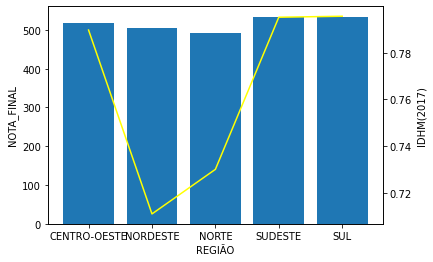

In [30]:
fig,ax = plt.subplots()

ax.bar('REGIÃO', 'NOTA_FINAL', data = media_por_regiao)
ax.set_xlabel('REGIÃO')
ax.set_ylabel('NOTA_FINAL')

ax2 = ax.twinx()
ax2.plot('REGIÃO', 'IDHM(2017)', data = media_por_regiao, color='yellow')
ax2.set_ylabel('IDHM(2017)')

plt.title = ('Nota Média Final por IDHM por REGIÃO')


## Em ordem decrescente, observamos que, em média, a região Sul apresentou a melhor NOTA_FINAL, e a região Norte, a pior.

In [31]:
media_por_regiao.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,REGIÃO,NOTA_FINAL,IDHM(2017)
0,3,SUDESTE,534.00,0.795250
1,4,SUL,534.00,0.795667
2,0,CENTRO-OESTE,517.50,0.789750
3,1,NORDESTE,504.25,0.710889
4,2,NORTE,493.25,0.730000


In [32]:
media_por_estado = media_por_estado.dropna()
# O Estado da Escola foi escolhido, para comparar por escolas.

In [33]:
media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,0,SC,537.00,537.50
1,1,RJ,548.50,536.50
2,2,MG,545.50,535.50
3,3,SP,534.00,534.50
4,4,RS,536.50,533.00
5,5,DF,541.50,532.50
6,6,PR,526.00,531.00
7,7,ES,534.00,529.50
8,8,GO,531.00,521.00
9,9,MS,508.25,513.50


TypeError: ignored

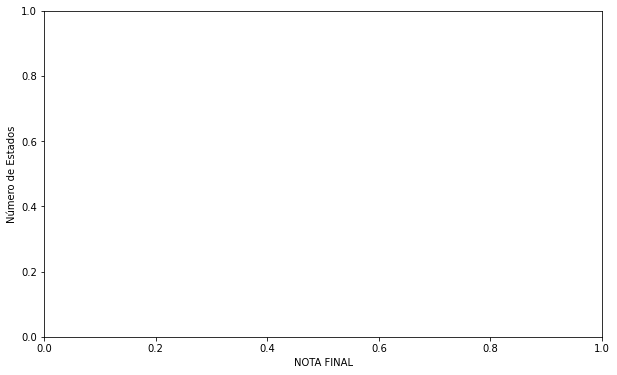

In [34]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('Número de Estados')
plt.title('Distribuição da Nota Final Média dos Estados')
media_por_estado['NOTA_FINAL'].hist(edgecolor="white", bins=10)

### Esta é uma distribuição muito irregular, mostra a extrema desigualdade educacional entre os Estados.

In [ ]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA DA REDAÇÃO')
plt.ylabel('Número de Estados')
plt.title('Distribuição da Nota Média da Redação dos Estados')
media_por_estado['NU_NOTA_REDACAO'].hist(edgecolor="white", bins=10)

In [ ]:
media_por_cidade = enem_2017.groupby(['NO_MUNICIPIO_PROVA']).mean()

In [ ]:
media_por_cidade = media_por_cidade.dropna()

In [ ]:
media_por_cidade.info()

In [ ]:
media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

In [ ]:
media_por_cidade.sample(10).reset_index()

In [ ]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('Número de Cidades')
plt.title('Distribuição da Nota Média Final por Cidades')
media_por_cidade['NOTA_FINAL'].hist(edgecolor="white", bins=10)


In [ ]:
dez_melhores_cidades = media_por_cidade.nlargest(10, 'NOTA_FINAL')
dez_melhores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).head(10)
dez_melhores_cidades = dez_melhores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_melhores_cidades.reset_index()

In [ ]:
dez_piores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=True).head(10)
dez_piores_cidades = dez_piores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_piores_cidades.reset_index()